<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
import numpy as np
dataset = np.array([['kor', 70],['math', 80]])
df = pd.DataFrame(dataset, columns=['class', 'score'])
df

,class,score
0,kor,70
1,math,80


In [4]:
#filepath = 'dataset/data.csv’
#df = pd.read_csv(filepath, na_values='NA', encoding='utf8')
#data.to_csv('result.csv', header=True, index=True, encoding='utf8')

In [5]:
!pip install scikit-learn

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


각 컬럼들 사이의 크기가 상당히 차이남.  
회귀분석 수행시 크기가 상대적으로 작은 petal width의 경우 다른 컬럼들에 비해 분석모델에 미친는 영향력이 적을 가능성 존재.  
변수 정규화 수행 근거.

In [11]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [12]:
list(df.index)

[0, 1]

In [13]:
df.index = ['A', 'B']

In [14]:
df.index

Index(['A', 'B'], dtype='object')

In [15]:
df

,class,score
A,kor,70
B,math,80


In [16]:
df.set_index('class', drop = True, append = False, inplace = True)
df

,score
class,
kor,70
math,80


In [17]:
df.reset_index(drop = False, inplace = False)

,class,score
0,kor,70
1,math,80


In [18]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [19]:
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
iris_columns = iris.columns.str.replace(' ', '_')
iris.head(3)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [21]:
iris.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
dtype: object

In [22]:
iris['sepal length'] = iris['petal width'].astype('int')
iris[['sepal width', 'petal length']] = \
iris[['sepal width', 'petal length']].astype('int')
iris.head(3)

,sepal length,sepal width,petal length,petal width
0,0,3,1,0.2
1,0,3,1,0.2
2,0,3,1,0.2


In [23]:
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris[1:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [24]:
iris['sepal length (cm)'].head(4)

0    5.1
1    4.9
2    4.7
3    4.6
Name: sepal length (cm), dtype: float64

In [25]:
iris[['sepal length (cm)', 'sepal width (cm)']].head(4)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [26]:
iris.iloc[1:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [27]:
iris.iloc[[1,3,5], 2:4]

,petal length (cm),petal width (cm)
1,1.4,0.2
3,1.5,0.2
5,1.7,0.4


In [28]:
iris.iloc[:, [True, True, False, True]]

,sepal length (cm),sepal width (cm),petal width (cm)
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [29]:
iris.loc[1:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [30]:
iris.loc[[1, 2], 'sepal length (cm)':'petal length (cm)']

,sepal length (cm),sepal width (cm),petal length (cm)
1,4.9,3.0,1.4
2,4.7,3.2,1.3


In [31]:
score = pd.DataFrame({'국어': [100, 80], '수학' : [75, 90], '영어' : [90, 95]}, index = ['장화', '홍련'])
score.loc['홍련', '영어'] = 100
score['국어'] = score['국어'] - 5
score

# 231024

,국어,수학,영어
장화,95,75,90
홍련,75,90,100


In [32]:
new_students = pd.DataFrame({'국어': [70, 85], '수학':[65, 100],
                             '영어':[95, 65]}, index=['콩쥐', '팥쥐'])
score = score.append(new_students)
score

<ipython-input-32-c1f9a954b21b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_students)


,국어,수학,영어
장화,95,75,90
홍련,75,90,100
콩쥐,70,65,95
팥쥐,85,100,65


In [33]:
new_student1 = pd.Series({'국어':85, '수학':55, '영어':95}, name='해님')
score = score.append(new_student1)
score

<ipython-input-33-9d1071124370>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_student1)


,국어,수학,영어
장화,95,75,90
홍련,75,90,100
콩쥐,70,65,95
팥쥐,85,100,65
해님,85,55,95


In [34]:
new_student2 = {'국어' : 75, '수학' : 80, '영어' : 80}
score.append(new_student2, ignore_index = True)

<ipython-input-34-750e3705bf4b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score.append(new_student2, ignore_index = True)


,국어,수학,영어
0,95,75,90
1,75,90,100
2,70,65,95
3,85,100,65
4,85,55,95
5,75,80,80


In [35]:
science = [80, 70, 90, 85, 75]
score['과학'] = science
score['학년'] = 1
score

,국어,수학,영어,과학,학년
장화,95,75,90,80,1
홍련,75,90,100,70,1
콩쥐,70,65,95,90,1
팥쥐,85,100,65,85,1
해님,85,55,95,75,1


In [36]:
score['과학'] = score['과학'] + 5
score['총점'] = score['국어'] + score['수학'] + score['영어'] + score['과학']
score

,국어,수학,영어,과학,학년,총점
장화,95,75,90,85,1,345
홍련,75,90,100,75,1,340
콩쥐,70,65,95,95,1,325
팥쥐,85,100,65,90,1,340
해님,85,55,95,80,1,315


In [37]:
score.drop('장화', inplace = True)
score.drop(columns = ['과학', '학년', '총점'], inplace = True)
score

,국어,수학,영어
홍련,75,90,100
콩쥐,70,65,95
팥쥐,85,100,65
해님,85,55,95


In [38]:
import pandas as pd
students = pd.DataFrame({'이름' : ['장화', '홍련', '콩쥐', '팥쥐', '해님', '달님'],
                         '국어' : [70, 85, None, 100, None, 85],
                         '수학' : [65, 100, 80, 95, None, 70]})
students[students['이름'] == '장화']

,이름,국어,수학
0,장화,70.0,65.0


In [39]:
students[(students['국어'] >= 80) & (students['수학'] >=80)]

,이름,국어,수학
1,홍련,85.0,100.0
3,팥쥐,100.0,95.0


In [40]:
students.loc[6, '이름' : '수학'] = ['별님', 50, 60]
students.loc[(students['국어'] >= 80) & (students['수학'] >= 70), '합격'] = 'Pass'
students.loc[students['합격'] != 'Pass', '합격'] = 'Fail'
students

,이름,국어,수학,합격
0,장화,70.0,65.0,Fail
1,홍련,85.0,100.0,Pass
2,콩쥐,NaN,80.0,Fail
3,팥쥐,100.0,95.0,Pass
4,해님,NaN,NaN,Fail
5,달님,85.0,70.0,Pass
6,별님,50.0,60.0,Fail


In [41]:
import numpy as np
condition_list = [(students['국어'] >= 90),
                  (students['국어'] >= 80) & (students['국어'] < 90),
                  (students['국어'] >= 70) & (students['국어'] < 80)]
choice_list = ['A', 'B', 'C']
students['점수'] = np.select(condition_list, choice_list, default = 'F')
students

,이름,국어,수학,합격,점수
0,장화,70.0,65.0,Fail,C
1,홍련,85.0,100.0,Pass,B
2,콩쥐,NaN,80.0,Fail,F
3,팥쥐,100.0,95.0,Pass,A
4,해님,NaN,NaN,Fail,F
5,달님,85.0,70.0,Pass,B
6,별님,50.0,60.0,Fail,F


In [42]:
students.isna()

,이름,국어,수학,합격,점수
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,True,True,False,False
5,False,False,False,False,False
6,False,False,False,False,False


In [43]:
students.notna()

,이름,국어,수학,합격,점수
0,True,True,True,True,True
1,True,True,True,True,True
2,True,False,True,True,True
3,True,True,True,True,True
4,True,False,False,True,True
5,True,True,True,True,True
6,True,True,True,True,True


In [44]:
students.isna().sum()

이름    0
국어    2
수학    1
합격    0
점수    0
dtype: int64

In [45]:
students.isna().sum(1)

# sum()은 열 합계, sum(1)은 행 합계

0    0
1    0
2    1
3    0
4    2
5    0
6    0
dtype: int64

In [46]:
students.dropna()

,이름,국어,수학,합격,점수
0,장화,70.0,65.0,Fail,C
1,홍련,85.0,100.0,Pass,B
3,팥쥐,100.0,95.0,Pass,A
5,달님,85.0,70.0,Pass,B
6,별님,50.0,60.0,Fail,F


In [47]:
students.dropna(thresh = 4)

# 결측값이 아닌 값이 4개보다 많은 행만 남기기

# 231027

,이름,국어,수학,합격,점수
0,장화,70.0,65.0,Fail,C
1,홍련,85.0,100.0,Pass,B
2,콩쥐,NaN,80.0,Fail,F
3,팥쥐,100.0,95.0,Pass,A
5,달님,85.0,70.0,Pass,B
6,별님,50.0,60.0,Fail,F


In [48]:
health = pd.DataFrame({'연도':[2017, 2018, 2019, 2020, 2021, 2022],
                       '키': [160, 162, 165, None, None, 166],
                       '몸무게': [53, 52, None, 50, 51, 54],
                       '시력': [1.2, None, 1.2, 1.2, 1.1, 0.8],
                       '병결': [None, None, None, 2, None, 1]})
health.fillna(0)

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,0.0,0.0
2,2019,165.0,0.0,1.2,0.0
3,2020,0.0,50.0,1.2,2.0
4,2021,0.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [49]:
health.fillna(health.mean())

,연도,키,몸무게,시력,병결
0,2017,160.00,53.0,1.2,1.5
1,2018,162.00,52.0,1.1,1.5
2,2019,165.00,52.0,1.2,1.5
3,2020,163.25,50.0,1.2,2.0
4,2021,163.25,51.0,1.1,1.5
5,2022,166.00,54.0,0.8,1.0


In [50]:
health['병결'] = health['병결'].fillna(0)
health['몸무게'] = health['몸무게'].fillna(health['몸무게'].mean())
health

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,NaN,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,NaN,50.0,1.2,2.0
4,2021,NaN,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [51]:
# 결측값 직전값으로 대체
health.fillna(method = 'pad', inplace = True) # 원본 update
health

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,165.0,50.0,1.2,2.0
4,2021,165.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [52]:
health['키'].drop_duplicates()

0    160.0
1    162.0
2    165.0
5    166.0
Name: 키, dtype: float64

In [53]:
set(health['키'])

{160.0, 162.0, 165.0, 166.0}

In [54]:
health[['시력', '병결']].drop_duplicates()

,시력,병결
0,1.2,0.0
3,1.2,2.0
4,1.1,0.0
5,0.8,1.0


In [55]:
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris.sort_index(ascending = False, inplace = True) # ascending = True 오름차순
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
149,5.9,3.0,5.1,1.8
148,6.2,3.4,5.4,2.3
147,6.5,3.0,5.2,2.0
146,6.3,2.5,5.0,1.9
145,6.7,3.0,5.2,2.3


In [56]:
iris.sort_index(axis = 1, ascending = True, inplace = True)
iris.head()

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
149,5.1,1.8,5.9,3.0
148,5.4,2.3,6.2,3.4
147,5.2,2.0,6.5,3.0
146,5.0,1.9,6.3,2.5
145,5.2,2.3,6.7,3.0


In [57]:
iris.sort_values('petal length (cm)')
# default = DataFrame.sort_values(by, axis = 0, ascending = Ture, inplace = False)

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
22,1.0,0.2,4.6,3.6
13,1.1,0.1,4.3,3.0
14,1.2,0.2,5.8,4.0
35,1.2,0.2,5.0,3.2
16,1.3,0.4,5.4,3.9
...,...,...,...,...
131,6.4,2.0,7.9,3.8
105,6.6,2.1,7.6,3.0
117,6.7,2.2,7.7,3.8
122,6.7,2.0,7.7,2.8


In [58]:
iris.sort_values(['petal width (cm)', 'sepal length (cm)'])

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
13,1.1,0.1,4.3,3.0
12,1.4,0.1,4.8,3.0
37,1.4,0.1,4.9,3.6
9,1.5,0.1,4.9,3.1
32,1.5,0.1,5.2,4.1
...,...,...,...,...
136,5.6,2.4,6.3,3.4
140,5.6,2.4,6.7,3.1
100,6.0,2.5,6.3,3.3
144,5.7,2.5,6.7,3.3


In [59]:
HR1 = pd.DataFrame({'이름' : ['장화', '홍련'],
                    '부서' : ['영업', '회계'],
                    '직급' : ['팀장', '사원']})
HR2 = pd.DataFrame({'이름' : ['콩쥐', '팥쥐'],
                    '직급' : ['사원', '팀장'],
                    '부서' : ['영업', '인사']})

pd.concat([HR1, HR2], axis = 0)

,이름,부서,직급
0,장화,영업,팀장
1,홍련,회계,사원
0,콩쥐,영업,사원
1,팥쥐,인사,팀장


In [60]:
pd.concat([HR1, HR2], axis = 0, ignore_index = True)

,이름,부서,직급
0,장화,영업,팀장
1,홍련,회계,사원
2,콩쥐,영업,사원
3,팥쥐,인사,팀장


In [61]:
HR3 = pd.DataFrame({'이름' : ['콩쥐', '팥쥐'],
                    '부서' : ['영업', '인사'],
                    '급여' : [3500, 2800]})
pd.concat([HR1, HR3], axis = 0, ignore_index = True)

,이름,부서,직급,급여
0,장화,영업,팀장,NaN
1,홍련,회계,사원,NaN
2,콩쥐,영업,NaN,3500.0
3,팥쥐,인사,NaN,2800.0


In [62]:
HR4 = pd.Series({1 : 2500}, name = '급여')
pd.concat([HR1, HR4], axis = 1)

,이름,부서,직급,급여
0,장화,영업,팀장,NaN
1,홍련,회계,사원,2500.0


In [63]:
HR5 = pd.DataFrame({'급여' : [4500, 3000, 3500]})
pd.concat([HR1, HR5], axis = 1)

,이름,부서,직급,급여
0,장화,영업,팀장,4500
1,홍련,회계,사원,3000
2,NaN,NaN,NaN,3500


In [65]:
product = pd.DataFrame({'상품코드':['G1', 'G2', 'G3', 'G4'],
                        '상품명':['우유', '감자', '빵', '치킨']})
product

,상품코드,상품명
0,G1,우유
1,G2,감자
2,G3,빵
3,G4,치킨


In [66]:
sale = pd.DataFrame({'주문번호' : [1001, 1002, 1002, 1003, 1004],
                     '상품코드' : ['G4', 'G3', 'G1', 'G3', 'G5'],
                     '주문수량' : [1, 4, 2, 2, 3]})
sale.merge(product, on = '상품코드', how = 'inner')

,주문번호,상품코드,주문수량,상품명
0,1001,G4,1,치킨
1,1002,G3,4,빵
2,1003,G3,2,빵
3,1002,G1,2,우유


In [67]:
sale.merge(product, on = '상품코드', how = 'outer', sort = True)

,주문번호,상품코드,주문수량,상품명
0,1002.0,G1,2.0,우유
1,NaN,G2,NaN,감자
2,1002.0,G3,4.0,빵
3,1003.0,G3,2.0,빵
4,1001.0,G4,1.0,치킨
5,1004.0,G5,3.0,NaN


In [68]:
sale.merge(product, left_on = '상품코드', right_on = '상품코드', how = 'left')

,주문번호,상품코드,주문수량,상품명
0,1001,G4,1,치킨
1,1002,G3,4,빵
2,1002,G1,2,우유
3,1003,G3,2,빵
4,1004,G5,3,NaN


In [71]:
IRIS = load_iris()
iris = pd.DataFrame(data = IRIS.data, columns = IRIS.feature_names)
iris['class'] = IRIS.target
iris['class'] = iris['class'].map({0 : 'setosa', 1 : 'versicolor', 2 : 'virginca'})
iris.groupby(by = 'class').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginca,6.588,2.974,5.552,2.026


In [72]:
iris.groupby(by='class').median()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginca,6.5,3.0,5.55,2.0


In [73]:
pd.Series(iris['class']).value_counts()

setosa        50
versicolor    50
virginca      50
Name: class, dtype: int64

In [74]:
iris['petal width level'] = pd.qcut(iris['petal width (cm)'], q = 3, labels = ['short', 'middle', 'long'])
pd.Series(iris['petal width level']).value_counts().to_frame()

,petal width level
middle,52
short,50
long,48


In [75]:
pd.crosstab(iris['petal width level'], iris['class'])

class,setosa,versicolor,virginca
petal width level,,,
short,50,0,0
middle,0,48,4
long,0,2,46


In [80]:
score = {'학년':[1, 1, 1, 1, 2, 2],
         '반':['A', 'A', 'B', 'B', 'C', 'C'],
         '성별':['여자', '남자', '여자', '남자', '여자', '남자'],
         '성적': [76, 88, 85, 72, 68, 70]}

score = pd.DataFrame(score)
score

,학년,반,성별,성적
0,1,A,여자,76
1,1,A,남자,88
2,1,B,여자,85
3,1,B,남자,72
4,2,C,여자,68
5,2,C,남자,70


In [81]:
score = score.pivot_table(index =['학년', '반'],
                          columns = '성별', values = '성적')
score

성별    남자  여자
학년 반        
1  A  88  76
   B  72  85
2  C  70  68

In [82]:
score.reset_index().melt(id_vars = ['학년', '반'], var_name = '성별', value_name = '성적')

,학년,반,성별,성적
0,1,A,남자,88
1,1,B,남자,72
2,2,C,남자,70
3,1,A,여자,76
4,1,B,여자,85
5,2,C,여자,68


In [83]:
score.apply(np.sqrt, axis = 0)

성별          남자        여자
학년 반                    
1  A  9.380832  8.717798
   B  8.485281  9.219544
2  C  8.366600  8.246211

In [84]:
score.apply(np.max, axis = 0)

성별
남자    88
여자    85
dtype: int64

In [88]:
def plus_five(val) :
  return val + 5
score.apply(plus_five)

성별    남자  여자
학년 반        
1  A  93  81
   B  77  90
2  C  75  73

In [90]:
from math import ceil
def class_avg(df) :
  return ceil((df['남자'] + df['여자'])/2)
score.apply(class_avg, axis = 1)

학년  반
1   A    82
    B    79
2   C    69
dtype: int64

In [92]:
score['남자'].map(lambda x : x + 5) # 데이터가 시리즈 형식일 때 lambda 사용 가능

학년  반
1   A    93
    B    77
2   C    75
Name: 남자, dtype: int64

In [94]:
import pandas as pd
landmark = pd.DataFrame({'name':['광화문','호미곶', '첨성대'],
                         'location':['서울 종로구 사직로 161',
                                     '경북 포항시 남구 호미곶면 대보리 150',
                                     '경북 경주시 인왕동 839-1']})
landmark['location'].str[3 : 5 + 1]

0    종로구
1    포항시
2    경주시
Name: location, dtype: object

In [96]:
landmark['location'].str.split(" ", expand = True)

,0,1,2,3,4,5
0,서울,종로구,사직로,161,None,None
1,경북,포항시,남구,호미곶면,대보리,150
2,경북,경주시,인왕동,839-1,None,None


In [98]:
landmark['loc_1'] = landmark['location'].str.split(" ").str[0]
landmark

,name,location,loc_1
0,광화문,서울 종로구 사직로 161,서울
1,호미곶,경북 포항시 남구 호미곶면 대보리 150,경북
2,첨성대,경북 경주시 인왕동 839-1,경북


In [99]:
landmark['location'].str.startswith('서울')

0     True
1    False
2    False
Name: location, dtype: bool

In [100]:
landmark['location'].str.endswith('1')

0     True
1    False
2     True
Name: location, dtype: bool

In [101]:
landmark['location'].str.contains('1')

0    True
1    True
2    True
Name: location, dtype: bool

In [102]:
from datetime import datetime
datetime.today()

datetime.datetime(2023, 11, 8, 0, 9, 27, 109016)

In [103]:
datetime.today().year

2023

In [104]:
datetime.strptime('2021-12-25 00:00:00', '%Y-%m-%d %H:%M:%S')

datetime.datetime(2021, 12, 25, 0, 0)

In [106]:
time = datetime.today()
time.strftime('%y-%m-%d %I:%M:%S')

'23-11-08 12:17:04'

In [107]:
# %A 요일 %a 요일 단축어 %B 월 %b 월 단축어 %I 12시간 표기
# %j 연중 몇번째 일 %U 연중 몇번째 주

In [109]:
from datetime import timedelta
time = datetime.today()
time + timedelta(days = 100)

datetime.datetime(2024, 2, 16, 0, 19, 32, 577190)

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0 : 'class_0', 1 : 'class_1', 2 : 'class_2'})

# 도수분포표
wine_type = wine['Class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

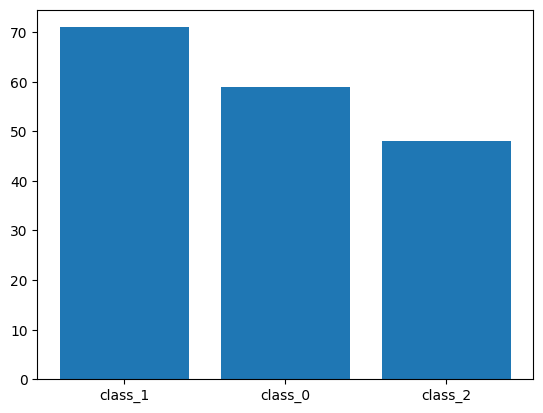

In [116]:
# 막대그래프 그리기
plt.bar(wine_type.index, wine_type.values, width = 0.8, bottom = None, align = 'center')
plt.show()

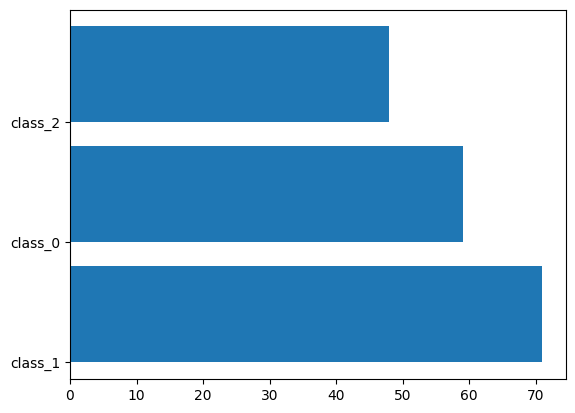

In [117]:
plt.barh(wine_type.index, wine_type.values, height = 0.8, left = None, align = 'edge')
plt.show()

In [118]:
# 범주의 개수 차이가 극단적일 경우 데이터 전처리 과정에서 업/다운 샘플링 등을 통해 각 범주 개수가 유사하도록 조정해야 한다는 인사이트를 얻을 수 있다.

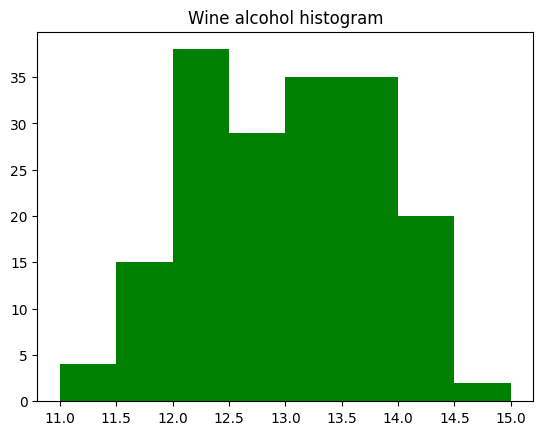

In [120]:
plt.title('Wine alcohol histogram')
plt.hist('alcohol', bins = 8, range = (11, 15), color = 'green', data = wine)
plt.show()

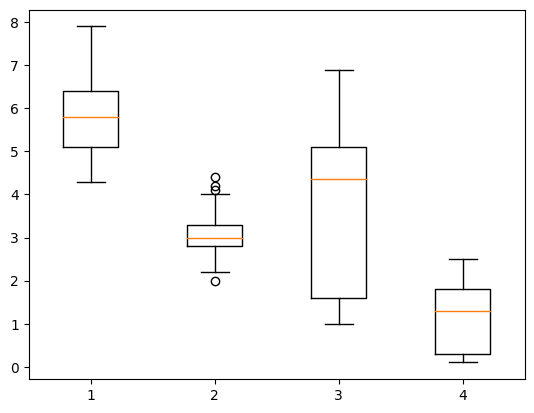

In [122]:
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0 : 'Setosa', 1 : 'Versicolour', 2 : 'Virginica'})

# boxplot 그리기
plt.boxplot(iris.drop(columns = 'class'))
plt.show()

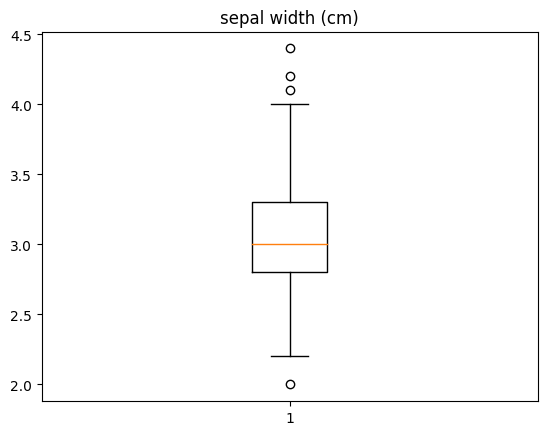

In [123]:
plt.boxplot(iris['sepal width (cm)'], whis = 1.5)
plt.title('sepal width (cm)')
plt.show()

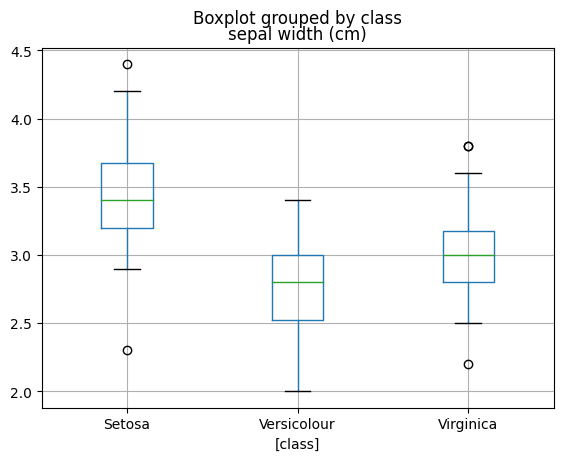

In [124]:
iris[['sepal width (cm)', 'class']].boxplot(by = 'class')
plt.show()

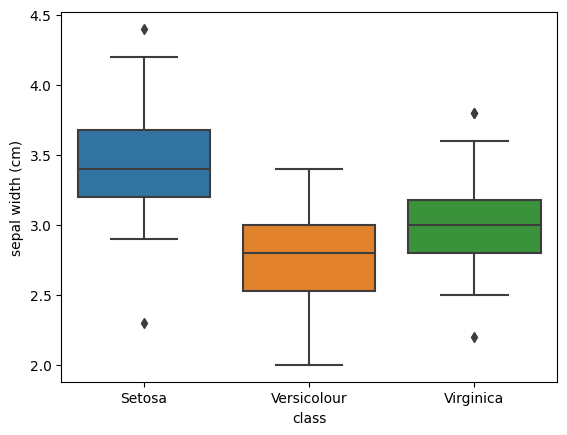

In [125]:
import seaborn as sns
sns.boxplot(x = 'class', y = 'sepal width (cm)', data = iris)
plt.show()